## <span style="color:blue">Introduction to computation in physical sciences</span>
### J Wang and A Wang, [github.com/com-py/intro](https://github.com/com-py/intro) 
### Ch07, `p6-grover`, Quantum Grover search

In [2]:
from sympy import *
from sympy.physics.quantum.qubit import Qubit, IntQubit, measure_partial
from sympy.physics.quantum.qubit import measure_partial_oneshot
from sympy.physics.quantum.gate import H
from sympy.physics.quantum.qapply import qapply
init_printing()

In [3]:
q = Qubit(0)
q

In [4]:
measure_partial(q,(0))

In [5]:
measure_partial_oneshot(q, [0])

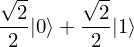

In [6]:
hq = qapply(H(0)*q)
hq

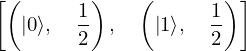

In [7]:
measure_partial(hq,(0))

In [8]:
measure_partial_oneshot(hq, [0])

In [10]:
res = []
for i in range(10):
    res.append(measure_partial_oneshot(hq, [0]))
res    

In [10]:
from sympy.physics.quantum.grover import OracleGate, WGate
from sympy.physics.quantum.grover import grover_iteration, apply_grover

In [11]:
# match function for target |01>
n = 2    # num of qubits, can be changed elsewhere
f = lambda basis: basis == IntQubit(Qubit('01'))
O = OracleGate(n, f)  # Oracle operator
W = WGate(n)

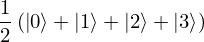

In [12]:
qs = IntQubit(Qubit('00'))  # initial qubits
psi0 = H(1)*H(0)*qs            # Uniform init state
psi0 = qapply(psi0)
simplify(psi0)

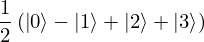

In [13]:
psi1 = qapply(O*psi0)  # 1st step, reverse target amplitude
simplify(psi1)

In [14]:
psi2 = qapply(W*psi1)  # 2st step, apply W gate
psi2

In [15]:
qapply(apply_grover(f, n)) # one step

In [16]:
n = 3    # num of qubits
f = lambda basis: basis == IntQubit(Qubit('001'))
O = OracleGate(n, f)  # Oracle operator
W = WGate(n)

In [17]:
c = sqrt(2)/4  # cancel factor
qs = IntQubit(Qubit('000'))
psi0 = H(2)*H(1)*H(0)*qs
psi0 = qapply(psi0)
simplify(psi0/c)

In [18]:
psi1 = qapply(O*psi0)  # 1st step, reverse target amplitude
simplify(psi1/c)

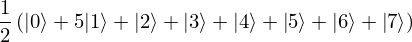

In [19]:
psi2 = qapply(W*psi1)  # 2st step, apply W gate
simplify(psi2/c)

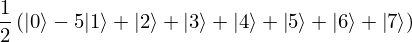

In [20]:
psi1 = qapply(O*psi2)  # repeat 1st step
simplify(psi1/c)

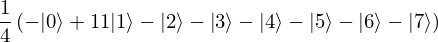

In [21]:
psi2 = qapply(W*psi1)  # repeat 2nd step, apply W gate
simplify(psi2/c)

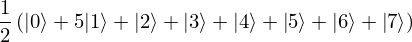

In [22]:
psi1 = qapply(grover_iteration(psi0, O))  # one iteration
simplify(psi1/c)

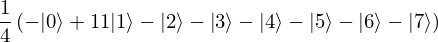

In [23]:
psi2 = qapply(grover_iteration(psi1, O))  # anotner one
simplify(psi2/c)

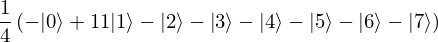

In [24]:
sol = qapply(apply_grover(f, n))  # fully automatic
simplify(sol/c)